**Arbol de Expansión Mínimo: Algoritmo Kruskal**

MST aplicando el Algortimo Kruskal a partir de una lista de adyacencia ponderada.

In [1]:
import graphviz as gv

In [2]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Funcion de busqueda Union Find

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    #  Aplicando del Algortimo Kruskal
    def kruskal(self):
        result = []
        i, e, tot_weight = 0, 0, 0
        # Ordena en función del item[2], lo cual sería el 3er elemento (w)
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            tot_weight = tot_weight + weight
            print("%d - %d: %d" % (u, v, weight))

        print("Costo total del MST para el grafo: ", tot_weight)


Funciones que permiten leer(readAdjl) y visualizar(adjlShow) una lista de adyacencia.

In [3]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [4]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

# Ingreso del grafo

Para representar el grafo se utilizará una lista de adyacencia
donde: \\
A = 0, B = 1, C = 2, D = 3, E = 4, F = 5, G = 6, H = 7

In [5]:
%%file 1.in
A B C D E F G H
1|31 2|36 6|43
0|31 2|37 3|35 5|44 6|40
0|36 1|37 3|33 4|53 7|58
1|35 2|33 4|42
1|38 2|53 3|42 5|48 7|41
1|44 4|48 6|39 7|46
0|43 1|40 5|39 7|44
2|58 4|41 5|46 6|44

Overwriting 1.in


Visualizamos el grafo ponderado a partir de la lista de Adyacencia ponderada contenida en el archivo 1.in

In [6]:
G, labels = readAdjl("1.in", haslabels=True, weighted=True)
print(labels)
g = Graph(8)
for i, edges in enumerate(G):
    for j in edges:
        # print(f"{i:2}: {j[0]} - {j[1]}")
        g.add_edge(i, j[0], j[1])
    print(f"{i:2}: {edges}")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
 0: [(1, 31), (2, 36), (6, 43)]
 1: [(0, 31), (2, 37), (3, 35), (5, 44), (6, 40)]
 2: [(0, 36), (1, 37), (3, 33), (4, 53), (7, 58)]
 3: [(1, 35), (2, 33), (4, 42)]
 4: [(1, 38), (2, 53), (3, 42), (5, 48), (7, 41)]
 5: [(1, 44), (4, 48), (6, 39), (7, 46)]
 6: [(0, 43), (1, 40), (5, 39), (7, 44)]
 7: [(2, 58), (4, 41), (5, 46), (6, 44)]


# Mostrar el grafo

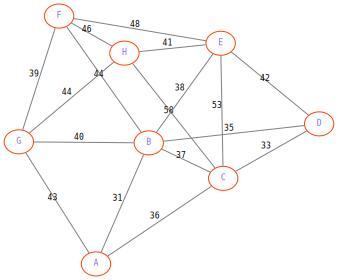

In [7]:
adjlShow(G, labels=labels, weighted=True)

# Algoritmo Kruskal
# Señalar cada costo por camino

In [8]:
g.kruskal()

0 - 1: 31
2 - 3: 33
1 - 3: 35
4 - 1: 38
5 - 6: 39
1 - 6: 40
4 - 7: 41
Costo total del MST para el grafo:  257


# Justificación

En el enunciado indica que debemos hallar el **mínimo costo posible por línea**, para ello podemos implementar un árbol de expansión mínima o MST.

Entonces, con la premisa de que debemos implementar un MST podemos optar por dos algoritmos: Kruskal o PRIM.

En este caso se opto por la realización del algoritmo Kruskal el cual se muestra en la clase Graph.